In [1]:
import numpy as np
import re
np.set_printoptions(suppress=True)

# Assumes 5 runs per configuration


In [2]:
runs=5

In [35]:
# f= open("serial_implementation/out_serial.txt","r")
f = open("mpi_sync/out_mpiSync_differentN.txt", "r")
# if f.mode == 'r':
f1 =f.readlines()
for x in f1:
    print(x)

nodes=1, processors=4

Problem size: 16

Iterations: 1609

Final cost: 367.381783, process: 0

Processing time: 0.001115 s

-------------------

Problem size: 16

Iterations: 1609

Final cost: 382.996015, process: 0

Processing time: 0.001091 s

-------------------

Problem size: 16

Iterations: 1609

Final cost: 316.123791, process: 0

Processing time: 0.001144 s

-------------------

Problem size: 16

Iterations: 1609

Final cost: 374.056402, process: 0

Processing time: 0.001127 s

-------------------

Problem size: 16

Iterations: 1609

Final cost: 363.656748, process: 0

Processing time: 0.005125 s

-------------------

-------------------

-------------------

Problem size: 64

Iterations: 470

Final cost: 1292.660666, process: 0

Processing time: 0.000419 s

-------------------

Problem size: 64

Iterations: 470

Final cost: 1541.775089, process: 0

Processing time: 0.000444 s

-------------------

Problem size: 64

Iterations: 470

Final cost: 1340.502606, process: 0

Processin

In [36]:
# get all lines with processing time
for x in f1:
#     if x.startswith('Processing') or x.startswith('Referer'):
    if x.startswith('Processing'):
           print(x)

Processing time: 0.001115 s

Processing time: 0.001091 s

Processing time: 0.001144 s

Processing time: 0.001127 s

Processing time: 0.005125 s

Processing time: 0.000419 s

Processing time: 0.000444 s

Processing time: 0.000433 s

Processing time: 0.000447 s

Processing time: 0.000371 s

Processing time: 0.001135 s

Processing time: 0.001176 s

Processing time: 0.001220 s

Processing time: 0.001161 s

Processing time: 0.001711 s

Processing time: 0.002492 s

Processing time: 0.002429 s

Processing time: 0.002496 s

Processing time: 0.002453 s

Processing time: 0.001900 s

Processing time: 0.004059 s

Processing time: 0.004972 s

Processing time: 0.005056 s

Processing time: 0.005190 s

Processing time: 0.005142 s

Processing time: 0.010081 s

Processing time: 0.010255 s

Processing time: 0.007323 s

Processing time: 0.010303 s

Processing time: 0.010355 s

Processing time: 0.021755 s

Processing time: 0.024065 s

Processing time: 0.021949 s

Processing time: 0.015066 s

Processing tim

In [37]:
# extract the time
for x in f1:
#     if x.startswith('Processing') or x.startswith('Referer'):
    if x.startswith('Processing'):
        t=re.findall("\d+\.\d+", x)
        #print(float(t[0]))
        

In [38]:
# Get all processing times
all_times=[]
for x in f1:
#     if x.startswith('Processing') or x.startswith('Referer'):
    if x.startswith('Processing'):
        t=re.findall("\d+\.\d+", x)
        t=float(t[0])
#         print(t)
        all_times= np.append(all_times,[t])
        

In [39]:
experiments=all_times.shape[0]/runs
experiments=int(experiments)
print((experiments))

12


In [40]:
# Get every 5 processing times
sections=all_times.shape[0]/runs
teepa = np.split(all_times, sections )


In [41]:
# Get average time for each config:
all_averages =[]
for t in teepa:
    avrg = np.average(t)
    all_averages = np.append(all_averages, avrg)


In [42]:
#  Get all costs:
all_costs =[]

for x in f1:
#     if x.startswith('Processing') or x.startswith('Referer'):
    if x.startswith('Final cost'):
        t=re.findall("\d+\.\d+", x)
        t=float(t[0])
#         print(t)
        all_costs= np.append(all_costs,[t])
    
    
#  Get average cost for each config:
tupsy = np.split(all_costs, sections )
cost_averages =[]
for t in tupsy:
    avrg_teepa = np.average(t)
    cost_averages = np.append(cost_averages, avrg_teepa)


print(cost_averages)

[    360.8429478    1383.2238244    2579.3519048    5256.817247
   11834.17644     26915.3232972   62471.6288968  143870.0842934
  728324.5972716 1576114.1659012 3280332.1571292 6700428.2544118]


In [43]:
# Get all iterations
iterations = []
for x in f1:
#     if x.startswith('Processing') or x.startswith('Referer'):
    if x.startswith('Iterations'):
        it=re.findall("\d+", x)
        iterations = np.append(iterations, it)
#         print(it[0])

iterations=iterations[1::5]
print((iterations))

['1609' '470' '1163' '1856' '2549' '3241' '3934' '4627' '6013' '6705'
 '7398' '8091']


In [44]:
# Get experiment input size (number of cities)
problem_sizes = []
for x in f1:
#     if x.startswith('Processing') or x.startswith('Referer'):
    if x.startswith('Problem'):
        p=re.findall("\d+", x)
        problem_sizes = np.append(problem_sizes, p)
#         print(p)

problem_sizes=problem_sizes[1::5]
print((problem_sizes))

['16' '64' '128' '256' '512' '1024' '2048' '4096' '16384' '32768' '65536'
 '131072']


In [45]:
# Make a nice print for omlit teepa tuppuh tupping teepa

for r in np.arange(experiments):
    print('Problem Size: ',problem_sizes[r])
    print('Iterations: ',iterations[r] )
    print('average time: ',np.around(all_averages[r],decimals=4))
    print('average cost:', np.around(cost_averages[r],decimals=4) )
    print('-------------------')
    print('\n')

Problem Size:  16
Iterations:  1609
average time:  0.0019
average cost: 360.8429
-------------------


Problem Size:  64
Iterations:  470
average time:  0.0004
average cost: 1383.2238
-------------------


Problem Size:  128
Iterations:  1163
average time:  0.0013
average cost: 2579.3519
-------------------


Problem Size:  256
Iterations:  1856
average time:  0.0024
average cost: 5256.8172
-------------------


Problem Size:  512
Iterations:  2549
average time:  0.0049
average cost: 11834.1764
-------------------


Problem Size:  1024
Iterations:  3241
average time:  0.0097
average cost: 26915.3233
-------------------


Problem Size:  2048
Iterations:  3934
average time:  0.021
average cost: 62471.6289
-------------------


Problem Size:  4096
Iterations:  4627
average time:  0.0452
average cost: 143870.0843
-------------------


Problem Size:  16384
Iterations:  6013
average time:  0.1575
average cost: 728324.5973
-------------------


Problem Size:  32768
Iterations:  6705
average t

In [46]:
# problem size
print(problem_sizes)

['16' '64' '128' '256' '512' '1024' '2048' '4096' '16384' '32768' '65536'
 '131072']


In [47]:
# iterations
print(iterations)

['1609' '470' '1163' '1856' '2549' '3241' '3934' '4627' '6013' '6705'
 '7398' '8091']


In [49]:
# time averages
print(all_averages)

[0.0019204 0.0004228 0.0012806 0.002354  0.0048838 0.0096634 0.020987
 0.0451512 0.1575444 0.3586926 0.7766378 1.5821672]


In [50]:
#cost averages
print(cost_averages)

[    360.8429478    1383.2238244    2579.3519048    5256.817247
   11834.17644     26915.3232972   62471.6288968  143870.0842934
  728324.5972716 1576114.1659012 3280332.1571292 6700428.2544118]


In [18]:
st = all_averages
si = iterations
sc = cost_averages

In [34]:
mat = all_averages
mai = iterations
mac = cost_averages

In [51]:
mst = all_averages
msi = iterations
msc = cost_averages

# Graphs

In [53]:
import matplotlib.pyplot as plt

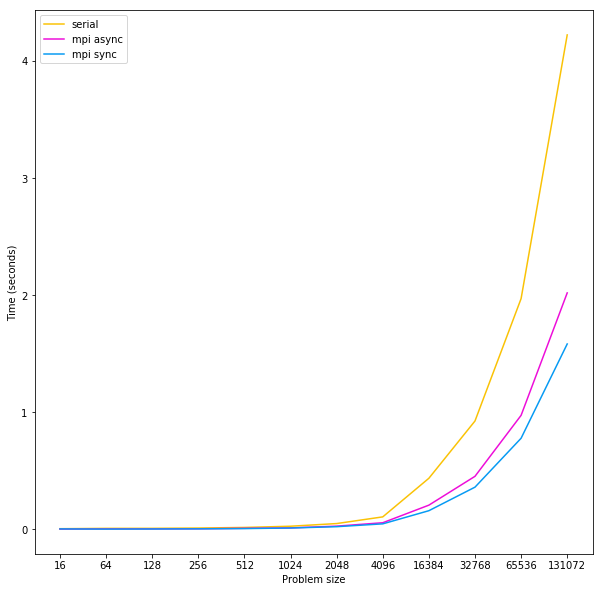

In [78]:
plt.plot(problem_sizes, st, label = "serial", color = 'xkcd:goldenrod')

plt.plot(problem_sizes, mat, label = "mpi async", color = 'xkcd:fuchsia')

plt.plot(problem_sizes, mst, label = 'mpi sync', color = 'xkcd:azure')

# plt.plot(problem_sizes, y4, label = 'cuda async', color = 'xkcd:crimson')

# plt.plot (problem_sizes, y5, label = 'cuda sync', color = 'xkcd:green')


plt.xlabel('Problem size')

plt.ylabel('Time (seconds)')

# show a legend on the plot
# plt.legend(bbox_to_anchor=(0.95, 0.8))
# plt.legend(bbox_to_anchor=(0.3, 0.65))
plt.legend()

# function to show the plot
# plt.show()
# plt.figure(figsize=(10,5))
# plt.show()
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig('graphing/graph.png')